### Importing of file and libraries
### Getting basic details of dataset

In [194]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [195]:
bank = pd.read_excel("F:\Learnbay_Data science\Projects\Projects 2022\Project Session _ Banking Domain-20220614T154345Z-001\Project Session _ Banking Domain/train.xlsx")

In [196]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [197]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [198]:
bank.shape

(45211, 17)

In [199]:
bank.info() #to check for null values in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [200]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [201]:
bank.isnull().sum() #checking for null values from all the columns

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Data cleaning process

In [202]:
# for a single value in a column, drop the column
# for two values, if ratio is 65%-70%, then keep else drop
# for more than two values, if ratio is 5%-35%, then keep else merge to create new category of around 8-9%

In [203]:
# Getting all unique values from each columns
print (bank.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [204]:
# Getting percentage distribution of those columns whose unique values are less than equal to 12

In [205]:
for i in bank.columns:
    a = bank[i].nunique()
#     if a <= 12:
    res = bank[i].value_counts(normalize = True)*100
    print ('\n', i.upper(), '\n\n', res)


 AGE 

 32    4.611710
31    4.414855
33    4.361770
34    4.268873
35    4.189246
        ...   
88    0.004424
92    0.004424
93    0.004424
95    0.004424
94    0.002212
Name: age, Length: 77, dtype: float64

 JOB 

 blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

 MARITAL 

 married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64

 EDUCATION 

 secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64

 DEFAULT 

 no     98.197341
yes     1.802659
Name: default, dtype: float64

 BALANCE 

  0        7.772445
 1        0.431311
 2        0.345049
 4        0.307447
 3        0.296

In [206]:
# Differentiate between categorical and numerical values

In [207]:
cat_cols = bank.select_dtypes(include = 'object')
num_cols =bank.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Categorical Columns are :  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [208]:
def display_outliers():
    plt.figure(figsize=(10,20))
    for i,col in enumerate(num_cols,1):
        plt.subplot(7,2,i)
        sns.boxplot(bank[col])
        plt.ylabel(col)
    plt.show()

F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

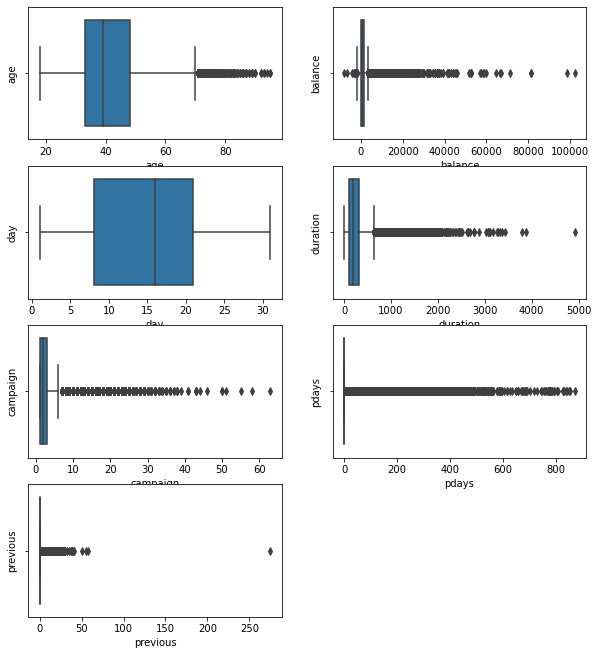

In [209]:
display_outliers()

In [210]:
# From above boxplots, we see outliers for Age, Balance, Campaign, Duration

In [211]:
# Defining the function to implement outlier detection
# for continuous variables, use 6sigma method and for discrete use quantile method, else percentile works for all

In [212]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [213]:
# Get the upper and lower whisker for all outlier bound columns

In [214]:
for col in num_cols:
    print (col, type(col))
    upper, lower = outliers(bank, col)
    print (col.upper())
    print("Start: ", upper)
    print("Stop: ", lower, '\n')

age <class 'str'>
AGE
Start:  70.5
Stop:  10.5 

balance <class 'str'>
BALANCE
Start:  3462.0
Stop:  -1962.0 

day <class 'str'>
DAY
Start:  40.5
Stop:  -11.5 

duration <class 'str'>
DURATION
Start:  643.0
Stop:  -221.0 

campaign <class 'str'>
CAMPAIGN
Start:  6.0
Stop:  -2.0 

pdays <class 'str'>
PDAYS
Start:  -1.0
Stop:  -1.0 

previous <class 'str'>
PREVIOUS
Start:  0.0
Stop:  0.0 



In [215]:
# Checking for number of outliers in all identified columns

In [216]:
def count_outliers():
    for col in num_cols:
        outlier = []
        upper, lower = outliers(bank, col)
        print (col,upper,lower)
        for i in bank[col]:
            if i<lower or i>upper:
                outlier.append(i)
        print("Number of outliers", np.shape(outlier))

In [217]:
count_outliers()

age 70.5 10.5
Number of outliers (487,)
balance 3462.0 -1962.0
Number of outliers (4729,)
day 40.5 -11.5
Number of outliers (0,)
duration 643.0 -221.0
Number of outliers (3235,)
campaign 6.0 -2.0
Number of outliers (3064,)
pdays -1.0 -1.0
Number of outliers (8257,)
previous 0.0 0.0
Number of outliers (8257,)


In [218]:
# Replace all outlier values with corresponding upper and lower whisker values

In [219]:
for col in num_cols:
    print (col, type(col))
    upper, lower = outliers(bank, col)
    bank[col] = np.where(bank[col]>upper,upper, np.where(bank[col]<lower,lower, bank[col]))
    print (bank[col])

age <class 'str'>
0        58.0
1        44.0
2        33.0
3        47.0
4        33.0
         ... 
45206    51.0
45207    70.5
45208    70.5
45209    57.0
45210    37.0
Name: age, Length: 45211, dtype: float64
balance <class 'str'>
0        2143.0
1          29.0
2           2.0
3        1506.0
4           1.0
          ...  
45206     825.0
45207    1729.0
45208    3462.0
45209     668.0
45210    2971.0
Name: balance, Length: 45211, dtype: float64
day <class 'str'>
0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
45206    17.0
45207    17.0
45208    17.0
45209    17.0
45210    17.0
Name: day, Length: 45211, dtype: float64
duration <class 'str'>
0        261.0
1        151.0
2         76.0
3         92.0
4        198.0
         ...  
45206    643.0
45207    456.0
45208    643.0
45209    508.0
45210    361.0
Name: duration, Length: 45211, dtype: float64
campaign <class 'str'>
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        .

In [220]:
# Checking for outlier values once again

F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

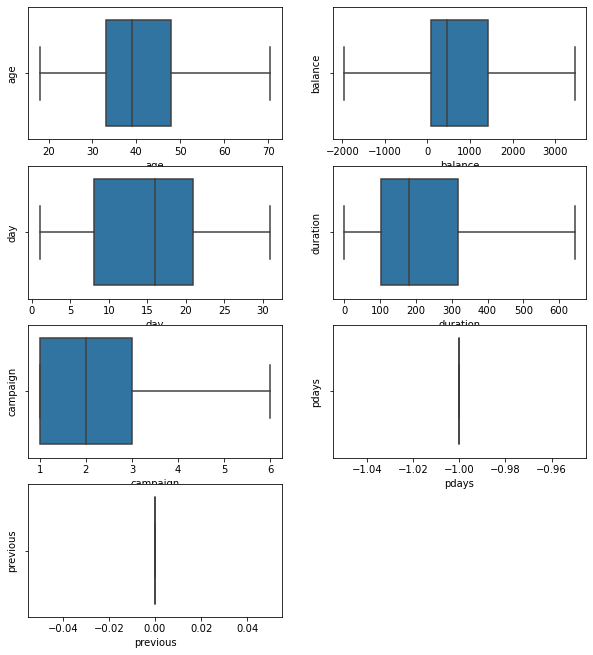

In [221]:
display_outliers()

In [222]:
count_outliers()

age 70.5 10.5
Number of outliers (0,)
balance 3462.0 -1962.0
Number of outliers (0,)
day 40.5 -11.5
Number of outliers (0,)
duration 643.0 -221.0
Number of outliers (0,)
campaign 6.0 -2.0
Number of outliers (0,)
pdays -1.0 -1.0
Number of outliers (0,)
previous 0.0 0.0
Number of outliers (0,)


In [223]:
# We can drop those columns who have only one values at highest percentage:
# Default column have No value at 98% and Yes at 2%, so can be dropped
# Loan column have No value at 84% and Yes at 16%, so can be dropped
# pdays can be dropped due to more than 80% of a single value
# previous can be dropped for the same above reason
# poutcomes can also be dropped for the same reason as above

In [224]:
bank_clean = bank.drop(['default','loan','pdays','previous','poutcome'], axis=1)

In [225]:
bank_clean

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y
0,58.0,management,married,tertiary,2143.0,yes,unknown,5.0,may,261.0,1.0,no
1,44.0,technician,single,secondary,29.0,yes,unknown,5.0,may,151.0,1.0,no
2,33.0,entrepreneur,married,secondary,2.0,yes,unknown,5.0,may,76.0,1.0,no
3,47.0,blue-collar,married,unknown,1506.0,yes,unknown,5.0,may,92.0,1.0,no
4,33.0,unknown,single,unknown,1.0,no,unknown,5.0,may,198.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,825.0,no,cellular,17.0,nov,643.0,3.0,yes
45207,70.5,retired,divorced,primary,1729.0,no,cellular,17.0,nov,456.0,2.0,yes
45208,70.5,retired,married,secondary,3462.0,no,cellular,17.0,nov,643.0,5.0,yes
45209,57.0,blue-collar,married,secondary,668.0,no,telephone,17.0,nov,508.0,4.0,no


In [226]:
# For Job category, we can club the values to make new groups of substantial %

In [227]:
# JOB 

#  blue-collar      21.525735
# management       20.919688
# technician       16.803433
# admin.           11.437482
# services          9.188029
# retired           5.007631
# self-employed     3.492513
# entrepreneur      3.289023
# unemployed        2.882042
# housemaid         2.742695
# student           2.074716
# unknown           0.637013

In [228]:
# Self employed, entrepreneur, housemaid can be clubbed into one group - Self Employment
# Student, unkwown, unemployed can be grouped into another - Not employed

In [229]:
bank_clean['job'] = bank_clean['job'].replace(['self-employed', 'entrepreneur', 'housemaid'],'Self Employment')
bank_clean['job'] = bank_clean['job'].replace(['student', 'unknown', 'unemployed'],'Non Employment')
bank_clean['job'].unique()

array(['management', 'technician', 'Self Employment', 'blue-collar',
       'Non Employment', 'retired', 'admin.', 'services'], dtype=object)

### Data Transformation

In [230]:
# Scalers are generally used for whole dataset instead of a single column
# Scalers are use for datasets where regression is to implemented

In [231]:
# Age - keep raw and binning (bin into minimum number as possible combining the nearest ones together)
# Binning should be made with ideally 3 bins (High, medium, low) or 5 (High, Medium-high, Medium, Medium-low, Low)
# 5-35% of total for all bins is best
# Month - binning to FY quarters starting from April, remove raw
# Day - binning to week of the month
# Balance and duration - keep raw, binning and ILATE transformation
# I-inverse (1/x)
# L-Log (log x)
# A-algebric (x^2,x^3, x^0.5, x^0.33)
# T-trigonometryv(sin x, cos x)
# E-exponential (e^x)
# Select the best feature among raw and ILATE columns using selectKbest feature selection method for using in the model

<AxesSubplot:xlabel='age', ylabel='Count'>

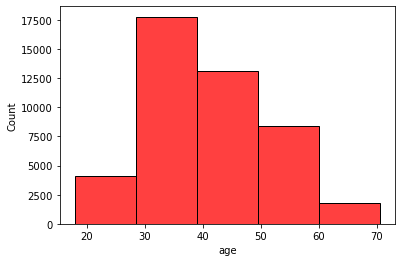

In [232]:
sns.histplot(bank_clean.loc[bank_clean.index, 'age'], bins = 5, color = 'red')

In [233]:
bank_clean.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y
0,58.0,management,married,tertiary,2143.0,yes,unknown,5.0,may,261.0,1.0,no
1,44.0,technician,single,secondary,29.0,yes,unknown,5.0,may,151.0,1.0,no
2,33.0,Self Employment,married,secondary,2.0,yes,unknown,5.0,may,76.0,1.0,no
3,47.0,blue-collar,married,unknown,1506.0,yes,unknown,5.0,may,92.0,1.0,no
4,33.0,Non Employment,single,unknown,1.0,no,unknown,5.0,may,198.0,1.0,no


In [234]:
bank_clean['age_binned'] = pd.qcut(bank_clean['age'],q=5)
bank_clean['age_binned'] = bank_clean['age_binned'].astype(str).str.replace("(","")
bank_clean['age_binned'] = bank_clean['age_binned'].astype(str).str.replace("]","")
bank_clean['age_binned'] = bank_clean['age_binned'].astype(str).str.replace("(","")

<ipython-input-234-3019c459820f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bank_clean['age_binned'] = bank_clean['age_binned'].astype(str).str.replace("(","")
<ipython-input-234-3019c459820f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bank_clean['age_binned'] = bank_clean['age_binned'].astype(str).str.replace("]","")
<ipython-input-234-3019c459820f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bank_clean['age_binned'] = bank_clean['age_binned'].astype(str).str.replace("(","")


In [235]:
bank_clean.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,age_binned
0,58.0,management,married,tertiary,2143.0,yes,unknown,5.0,may,261.0,1.0,no,"51.0, 70.5"
1,44.0,technician,single,secondary,29.0,yes,unknown,5.0,may,151.0,1.0,no,"42.0, 51.0"
2,33.0,Self Employment,married,secondary,2.0,yes,unknown,5.0,may,76.0,1.0,no,"32.0, 36.0"
3,47.0,blue-collar,married,unknown,1506.0,yes,unknown,5.0,may,92.0,1.0,no,"42.0, 51.0"
4,33.0,Non Employment,single,unknown,1.0,no,unknown,5.0,may,198.0,1.0,no,"32.0, 36.0"


In [236]:
Q1 = ['apr','may','jun']
Q2 = ['jul','aug','sep']
Q3 = ['oct','nov','dec']
Q4 = ['jan','feb','mar']

def condition(x):
    if x in Q1:
        return 'Q1'
    elif x in Q2:
        return 'Q2'
    elif x in Q3:
        return 'Q3'
    else:
        return 'Q4'

bank_clean['Month_Quarters'] = bank_clean['month'].apply(condition)

In [237]:
bank_clean.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,age_binned,Month_Quarters
0,58.0,management,married,tertiary,2143.0,yes,unknown,5.0,may,261.0,1.0,no,"51.0, 70.5",Q1
1,44.0,technician,single,secondary,29.0,yes,unknown,5.0,may,151.0,1.0,no,"42.0, 51.0",Q1
2,33.0,Self Employment,married,secondary,2.0,yes,unknown,5.0,may,76.0,1.0,no,"32.0, 36.0",Q1
3,47.0,blue-collar,married,unknown,1506.0,yes,unknown,5.0,may,92.0,1.0,no,"42.0, 51.0",Q1
4,33.0,Non Employment,single,unknown,1.0,no,unknown,5.0,may,198.0,1.0,no,"32.0, 36.0",Q1


In [238]:
bank_clean.drop('month', inplace = True, axis = 1)

In [239]:
bank_clean.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,y,age_binned,Month_Quarters
0,58.0,management,married,tertiary,2143.0,yes,unknown,5.0,261.0,1.0,no,"51.0, 70.5",Q1
1,44.0,technician,single,secondary,29.0,yes,unknown,5.0,151.0,1.0,no,"42.0, 51.0",Q1
2,33.0,Self Employment,married,secondary,2.0,yes,unknown,5.0,76.0,1.0,no,"32.0, 36.0",Q1
3,47.0,blue-collar,married,unknown,1506.0,yes,unknown,5.0,92.0,1.0,no,"42.0, 51.0",Q1
4,33.0,Non Employment,single,unknown,1.0,no,unknown,5.0,198.0,1.0,no,"32.0, 36.0",Q1


In [240]:
def condition_2(x):
    if x in range(1,8):
        return 1
    elif x in range(8,15):
        return 2
    elif x in range(15,22):
        return 3
    else:
        return 4

bank_clean['Week'] = bank_clean['day'].apply(condition_2)

In [241]:
bank_clean.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,y,age_binned,Month_Quarters,Week
0,58.0,management,married,tertiary,2143.0,yes,unknown,5.0,261.0,1.0,no,"51.0, 70.5",Q1,1
1,44.0,technician,single,secondary,29.0,yes,unknown,5.0,151.0,1.0,no,"42.0, 51.0",Q1,1
2,33.0,Self Employment,married,secondary,2.0,yes,unknown,5.0,76.0,1.0,no,"32.0, 36.0",Q1,1
3,47.0,blue-collar,married,unknown,1506.0,yes,unknown,5.0,92.0,1.0,no,"42.0, 51.0",Q1,1
4,33.0,Non Employment,single,unknown,1.0,no,unknown,5.0,198.0,1.0,no,"32.0, 36.0",Q1,1


<AxesSubplot:xlabel='balance', ylabel='Count'>

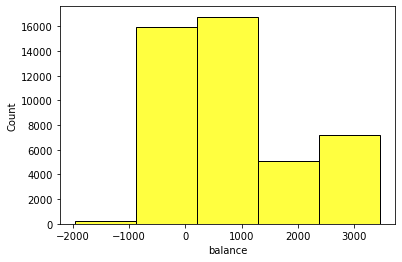

In [242]:
sns.histplot(bank_clean.loc[bank_clean.index,'balance'], bins = 5, color = 'yellow')

In [243]:
bank_clean['balance_binned'] = pd.qcut(bank_clean['balance'], q=5)
bank_clean['balance_binned'] = bank_clean['balance_binned'].astype(str).str.replace("(","")
bank_clean['balance_binned'] = bank_clean['balance_binned'].astype(str).str.replace("]","")
bank_clean.head()

<ipython-input-243-22e732976876>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bank_clean['balance_binned'] = bank_clean['balance_binned'].astype(str).str.replace("(","")
<ipython-input-243-22e732976876>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bank_clean['balance_binned'] = bank_clean['balance_binned'].astype(str).str.replace("]","")


,age,job,marital,education,balance,housing,contact,day,duration,campaign,y,age_binned,Month_Quarters,Week,balance_binned
0,58.0,management,married,tertiary,2143.0,yes,unknown,5.0,261.0,1.0,no,"51.0, 70.5",Q1,1,"1859.0, 3462.0"
1,44.0,technician,single,secondary,29.0,yes,unknown,5.0,151.0,1.0,no,"42.0, 51.0",Q1,1,"22.0, 272.0"
2,33.0,Self Employment,married,secondary,2.0,yes,unknown,5.0,76.0,1.0,no,"32.0, 36.0",Q1,1,"-1962.001, 22.0"
3,47.0,blue-collar,married,unknown,1506.0,yes,unknown,5.0,92.0,1.0,no,"42.0, 51.0",Q1,1,"701.0, 1859.0"
4,33.0,Non Employment,single,unknown,1.0,no,unknown,5.0,198.0,1.0,no,"32.0, 36.0",Q1,1,"-1962.001, 22.0"


<AxesSubplot:xlabel='duration', ylabel='Count'>

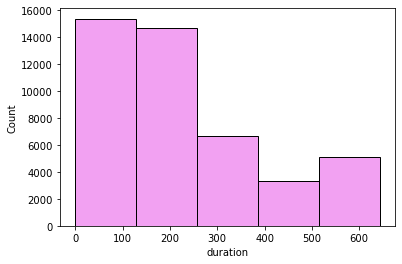

In [244]:
sns.histplot(bank_clean.loc[bank_clean.index,'duration'], bins = 5, color = 'violet')

In [245]:
bank_clean['duration_binned'] = pd.qcut(bank_clean['duration'], q=5)
bank_clean['duration_binned'] = bank_clean['duration_binned'].astype(str).str.replace("(","")
bank_clean['duration_binned'] = bank_clean['duration_binned'].astype(str).str.replace("]","")
bank_clean.head()

<ipython-input-245-d1776db0ef5a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bank_clean['duration_binned'] = bank_clean['duration_binned'].astype(str).str.replace("(","")
<ipython-input-245-d1776db0ef5a>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bank_clean['duration_binned'] = bank_clean['duration_binned'].astype(str).str.replace("]","")


,age,job,marital,education,balance,housing,contact,day,duration,campaign,y,age_binned,Month_Quarters,Week,balance_binned,duration_binned
0,58.0,management,married,tertiary,2143.0,yes,unknown,5.0,261.0,1.0,no,"51.0, 70.5",Q1,1,"1859.0, 3462.0","223.0, 368.0"
1,44.0,technician,single,secondary,29.0,yes,unknown,5.0,151.0,1.0,no,"42.0, 51.0",Q1,1,"22.0, 272.0","147.0, 223.0"
2,33.0,Self Employment,married,secondary,2.0,yes,unknown,5.0,76.0,1.0,no,"32.0, 36.0",Q1,1,"-1962.001, 22.0","-0.001, 89.0"
3,47.0,blue-collar,married,unknown,1506.0,yes,unknown,5.0,92.0,1.0,no,"42.0, 51.0",Q1,1,"701.0, 1859.0","89.0, 147.0"
4,33.0,Non Employment,single,unknown,1.0,no,unknown,5.0,198.0,1.0,no,"32.0, 36.0",Q1,1,"-1962.001, 22.0","147.0, 223.0"


In [246]:
def ILATE(df, feature):
    df[feature+'_'+'Inverse'] = df[feature].apply(lambda x: 1/x if x != 0 else 0)
    df[feature+'_'+'Log'] = df[feature].apply(lambda x: math.log(x) if x > 0 else 0)
    df[feature+'_'+'Square'] = df[feature].apply(lambda x: x*x)
    df[feature+'_'+'Cube'] = df[feature].apply(lambda x: x*x*x)
    df[feature+'_'+'Square Root'] = df[feature].apply(lambda x: math.sqrt(x) if x > 0 else 0)
    df[feature+'_'+'Cube Root'] = df[feature].apply(lambda x: math.pow(x,(1/3)) if x > 0 else 0)
    df[feature+'_'+'Sin'] = df[feature].apply(lambda x: math.sin(x) if x > 0 else 0)
    df[feature+'_'+'Cos'] = df[feature].apply(lambda x: math.cos(x) if x > 0 else 0)
#     df[feature+'_'+'Exponential'] = df[feature].apply(lambda x: math.exp(x))

In [247]:
ILATE(bank_clean,'duration')

In [248]:
ILATE(bank_clean,'balance')

In [249]:
bank_clean.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,...,duration_Sin,duration_Cos,balance_Inverse,balance_Log,balance_Square,balance_Cube,balance_Square Root,balance_Cube Root,balance_Sin,balance_Cos
0,58.0,management,married,tertiary,2143.0,yes,unknown,5.0,261.0,1.0,...,-0.245281,-0.969452,0.000467,7.669962,4592449.0,9.841618e+09,46.292548,12.892606,0.420331,0.907371
1,44.0,technician,single,secondary,29.0,yes,unknown,5.0,151.0,1.0,...,0.202150,0.979355,0.034483,3.367296,841.0,2.438900e+04,5.385165,3.072317,-0.663634,-0.748058
2,33.0,Self Employment,married,secondary,2.0,yes,unknown,5.0,76.0,1.0,...,0.566108,0.824331,0.500000,0.693147,4.0,8.000000e+00,1.414214,1.259921,0.909297,-0.416147
3,47.0,blue-collar,married,unknown,1506.0,yes,unknown,5.0,92.0,1.0,...,-0.779466,-0.626444,0.000664,7.317212,2268036.0,3.415662e+09,38.807216,11.462385,-0.923505,-0.383587
4,33.0,Non Employment,single,unknown,1.0,no,unknown,5.0,198.0,1.0,...,-0.079579,-0.996829,1.000000,0.000000,1.0,1.000000e+00,1.000000,1.000000,0.841471,0.540302


### Data Preparation

In [250]:
bank_clean.dtypes

age                     float64
job                      object
marital                  object
education                object
balance                 float64
housing                  object
contact                  object
day                     float64
duration                float64
campaign                float64
y                        object
age_binned               object
Month_Quarters           object
Week                      int64
balance_binned           object
duration_binned          object
duration_Inverse        float64
duration_Log            float64
duration_Square         float64
duration_Cube           float64
duration_Square Root    float64
duration_Cube Root      float64
duration_Sin            float64
duration_Cos            float64
balance_Inverse         float64
balance_Log             float64
balance_Square          float64
balance_Cube            float64
balance_Square Root     float64
balance_Cube Root       float64
balance_Sin             float64
balance_

In [251]:
# Segregating all the variables to numerical and categorical
cat_cols = bank_clean.select_dtypes(include = 'object')
num_cols =bank_clean.select_dtypes(include = np.number)

In [252]:
cat_cols.head()

,job,marital,education,housing,contact,y,age_binned,Month_Quarters,balance_binned,duration_binned
0,management,married,tertiary,yes,unknown,no,"51.0, 70.5",Q1,"1859.0, 3462.0","223.0, 368.0"
1,technician,single,secondary,yes,unknown,no,"42.0, 51.0",Q1,"22.0, 272.0","147.0, 223.0"
2,Self Employment,married,secondary,yes,unknown,no,"32.0, 36.0",Q1,"-1962.001, 22.0","-0.001, 89.0"
3,blue-collar,married,unknown,yes,unknown,no,"42.0, 51.0",Q1,"701.0, 1859.0","89.0, 147.0"
4,Non Employment,single,unknown,no,unknown,no,"32.0, 36.0",Q1,"-1962.001, 22.0","147.0, 223.0"


In [253]:
# Creating onehot encoding for all the categorical nominal variables

job = pd.get_dummies(cat_cols['job'], prefix = 'job')
marital = pd.get_dummies(cat_cols['marital'], prefix = 'marital')
education = pd.get_dummies(cat_cols['education'], prefix = 'education')
housing = pd.get_dummies(cat_cols['housing'], prefix = 'housing')
contact = pd.get_dummies(cat_cols['contact'], prefix = 'contact')
Month_Quarters = pd.get_dummies(cat_cols['Month_Quarters'], prefix = 'Month_Quarters')

In [254]:
# Creating a new categorical dataframe with onehot encoding values and variables
cat_cols_new = pd.concat([cat_cols,job,marital, education, housing, contact], axis=1)

In [255]:
cat_cols_new.head()

,job,marital,education,housing,contact,y,age_binned,Month_Quarters,balance_binned,duration_binned,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,contact_cellular,contact_telephone,contact_unknown
0,management,married,tertiary,yes,unknown,no,"51.0, 70.5",Q1,"1859.0, 3462.0","223.0, 368.0",...,0,0,0,1,0,0,1,0,0,1
1,technician,single,secondary,yes,unknown,no,"42.0, 51.0",Q1,"22.0, 272.0","147.0, 223.0",...,1,0,1,0,0,0,1,0,0,1
2,Self Employment,married,secondary,yes,unknown,no,"32.0, 36.0",Q1,"-1962.001, 22.0","-0.001, 89.0",...,0,0,1,0,0,0,1,0,0,1
3,blue-collar,married,unknown,yes,unknown,no,"42.0, 51.0",Q1,"701.0, 1859.0","89.0, 147.0",...,0,0,0,0,1,0,1,0,0,1
4,Non Employment,single,unknown,no,unknown,no,"32.0, 36.0",Q1,"-1962.001, 22.0","147.0, 223.0",...,1,0,0,0,1,1,0,0,0,1


In [256]:
# Implementing LabelEncoder for all the ordinal categorical variables

In [257]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols_new['age_binned'] = le.fit_transform(cat_cols_new['age_binned'])
cat_cols_new['balance_binned'] = le.fit_transform(cat_cols_new['balance_binned'])
cat_cols_new['duration_binned'] = le.fit_transform(cat_cols_new['duration_binned'])
cat_cols_new['Month_Quarters'] = le.fit_transform(cat_cols_new['Month_Quarters'])

In [258]:
cat_cols_new.head()

,job,marital,education,housing,contact,y,age_binned,Month_Quarters,balance_binned,duration_binned,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,contact_cellular,contact_telephone,contact_unknown
0,management,married,tertiary,yes,unknown,no,4,0,1,2,...,0,0,0,1,0,0,1,0,0,1
1,technician,single,secondary,yes,unknown,no,3,0,2,1,...,1,0,1,0,0,0,1,0,0,1
2,Self Employment,married,secondary,yes,unknown,no,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,blue-collar,married,unknown,yes,unknown,no,3,0,4,4,...,0,0,0,0,1,0,1,0,0,1
4,Non Employment,single,unknown,no,unknown,no,1,0,0,1,...,1,0,0,0,1,1,0,0,0,1


In [259]:
# Dropping all the original columns on whom onehotencoding had been applied
cat_cols_new.drop(['job','marital','education','housing','contact','y'], axis=1, inplace = True)

In [260]:
cat_cols_new.head()

,age_binned,Month_Quarters,balance_binned,duration_binned,job_Non Employment,job_Self Employment,job_admin.,job_blue-collar,job_management,job_retired,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,contact_cellular,contact_telephone,contact_unknown
0,4,0,1,2,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1,3,0,2,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,3,0,4,4,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
4,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1


In [261]:
num_cols.head()

,age,balance,day,duration,campaign,Week,duration_Inverse,duration_Log,duration_Square,duration_Cube,...,duration_Sin,duration_Cos,balance_Inverse,balance_Log,balance_Square,balance_Cube,balance_Square Root,balance_Cube Root,balance_Sin,balance_Cos
0,58.0,2143.0,5.0,261.0,1.0,1,0.003831,5.564520,68121.0,17779581.0,...,-0.245281,-0.969452,0.000467,7.669962,4592449.0,9.841618e+09,46.292548,12.892606,0.420331,0.907371
1,44.0,29.0,5.0,151.0,1.0,1,0.006623,5.017280,22801.0,3442951.0,...,0.202150,0.979355,0.034483,3.367296,841.0,2.438900e+04,5.385165,3.072317,-0.663634,-0.748058
2,33.0,2.0,5.0,76.0,1.0,1,0.013158,4.330733,5776.0,438976.0,...,0.566108,0.824331,0.500000,0.693147,4.0,8.000000e+00,1.414214,1.259921,0.909297,-0.416147
3,47.0,1506.0,5.0,92.0,1.0,1,0.010870,4.521789,8464.0,778688.0,...,-0.779466,-0.626444,0.000664,7.317212,2268036.0,3.415662e+09,38.807216,11.462385,-0.923505,-0.383587
4,33.0,1.0,5.0,198.0,1.0,1,0.005051,5.288267,39204.0,7762392.0,...,-0.079579,-0.996829,1.000000,0.000000,1.0,1.000000e+00,1.000000,1.000000,0.841471,0.540302


In [263]:
# Extracting the Outcome column for our ease of segregation
y = le.fit_transform(cat_cols['y'])
y

array([0, 0, 0, ..., 1, 0, 0])

In [264]:
num_cols.shape

(45211, 22)

### Feature Selection

In [265]:
# Implementing the SelectKBest feature to select all the columns with the best contribution to Outcome 'y'

from sklearn.feature_selection import SelectKBest, chi2
select = SelectKBest(k=15)
selected_feature = select.fit_transform(num_cols,y)
selected_feature.shape

(45211, 15)

In [266]:
# Getting the score and values of the selected features
scores = select.scores_
pvalues = select.pvalues_

In [267]:
# Creating a dataframe of selection of all the columns
kept_features = pd.DataFrame({'columns': num_cols.columns,
                              'Scores': scores, 'Pvalues':pvalues,'Kept':select.get_support()})
kept_features

,columns,Scores,Pvalues,Kept
0,age,16.284297,5.460345e-05,False
1,balance,393.770845,2.944981e-87,True
2,day,36.359010,1.653880e-09,False
3,duration,8142.133567,0.000000e+00,True
4,campaign,321.733197,1.077296e-71,True
5,Week,15.884212,6.744371e-05,False
6,duration_Inverse,760.536589,4.894897e-166,True
7,duration_Log,5093.186521,0.000000e+00,True
8,duration_Square,8572.040692,0.000000e+00,True
9,duration_Cube,8324.721083,0.000000e+00,True


In [268]:
# Getting the new dataframe with selected features only
num_cols_new = num_cols.iloc[:,select.get_support()]
num_cols_new

,balance,duration,campaign,duration_Inverse,duration_Log,duration_Square,duration_Cube,duration_Square Root,duration_Cube Root,duration_Sin,balance_Log,balance_Square,balance_Cube,balance_Square Root,balance_Cube Root
0,2143.0,261.0,1.0,0.003831,5.564520,68121.0,17779581.0,16.155494,6.390677,-0.245281,7.669962,4592449.0,9.841618e+09,46.292548,12.892606
1,29.0,151.0,1.0,0.006623,5.017280,22801.0,3442951.0,12.288206,5.325074,0.202150,3.367296,841.0,2.438900e+04,5.385165,3.072317
2,2.0,76.0,1.0,0.013158,4.330733,5776.0,438976.0,8.717798,4.235824,0.566108,0.693147,4.0,8.000000e+00,1.414214,1.259921
3,1506.0,92.0,1.0,0.010870,4.521789,8464.0,778688.0,9.591663,4.514357,-0.779466,7.317212,2268036.0,3.415662e+09,38.807216,11.462385
4,1.0,198.0,1.0,0.005051,5.288267,39204.0,7762392.0,14.071247,5.828477,-0.079579,0.000000,1.0,1.000000e+00,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825.0,643.0,3.0,0.001555,6.466145,413449.0,265847707.0,25.357445,8.631183,0.855489,6.715383,680625.0,5.615156e+08,28.722813,9.378887
45207,1729.0,456.0,2.0,0.002193,6.122493,207936.0,94818816.0,21.354157,7.697002,-0.452053,7.455298,2989441.0,5.168743e+09,41.581246,12.002314
45208,3462.0,643.0,5.0,0.001555,6.466145,413449.0,265847707.0,25.357445,8.631183,0.855489,8.149602,11985444.0,4.149361e+10,58.838763,15.127797
45209,668.0,508.0,4.0,0.001969,6.230481,258064.0,131096512.0,22.538855,7.979112,-0.806383,6.504288,446224.0,2.980776e+08,25.845696,8.741625


### Creating the final master dataset required for modelling

In [269]:
bank_master = pd.concat([cat_cols_new,num_cols_new], axis=1)

In [270]:
bank_master.head()

,age_binned,Month_Quarters,balance_binned,duration_binned,job_Non Employment,job_Self Employment,job_admin.,job_blue-collar,job_management,job_retired,...,duration_Square,duration_Cube,duration_Square Root,duration_Cube Root,duration_Sin,balance_Log,balance_Square,balance_Cube,balance_Square Root,balance_Cube Root
0,4,0,1,2,0,0,0,0,1,0,...,68121.0,17779581.0,16.155494,6.390677,-0.245281,7.669962,4592449.0,9.841618e+09,46.292548,12.892606
1,3,0,2,1,0,0,0,0,0,0,...,22801.0,3442951.0,12.288206,5.325074,0.202150,3.367296,841.0,2.438900e+04,5.385165,3.072317
2,1,0,0,0,0,1,0,0,0,0,...,5776.0,438976.0,8.717798,4.235824,0.566108,0.693147,4.0,8.000000e+00,1.414214,1.259921
3,3,0,4,4,0,0,0,1,0,0,...,8464.0,778688.0,9.591663,4.514357,-0.779466,7.317212,2268036.0,3.415662e+09,38.807216,11.462385
4,1,0,0,1,1,0,0,0,0,0,...,39204.0,7762392.0,14.071247,5.828477,-0.079579,0.000000,1.0,1.000000e+00,1.000000,1.000000


### Train, Test and Split

In [272]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(bank_master,y,test_size=0.25, random_state=99)

In [274]:
print ("Training data shape", xtrain.shape)
print ("Training data shape", xtest.shape)

Training data shape (33908, 39)
Training data shape (11303, 39)


### Data Modelling

In [ ]:
# Logistic Regression

In [278]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(C=10, solver = 'liblinear', tol = 0.0001, random_state = 99, max_iter = 500)
lor.fit(xtrain, ytrain)
ypred_lor = lor.predict(xtest)

In [296]:
from sklearn import metrics
lor_acc = metrics.accuracy_score(ytest, ypred_lor)
print("Accuracy:", lor_acc)
lor_pre = metrics.precision_score(ytest,ypred_lor)
print("Precision", lor_pre)
lor_rec = metrics.recall_score(ytest,ypred_lor)
print("Recall", lor_rec)
lor_f1 = metrics.f1_score(ytest,ypred_lor)
print("f1_score", lor_f1)

Accuracy: 0.8820667079536406
Precision 0.4392712550607287
Recall 0.17046347211311863
f1_score 0.2456140350877193


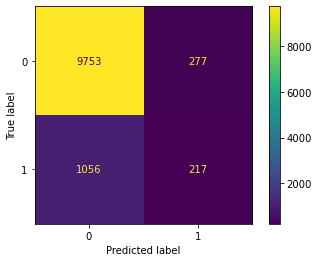

In [281]:
metrics.plot_confusion_matrix(lor,xtest,ytest)

In [ ]:
# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini')

In [289]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dt, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(xtrain,ytrain) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 150}


In [290]:
dt=DecisionTreeClassifier(criterion='gini',random_state=99,max_depth=6,min_samples_split=150)
dt.fit(xtrain,ytrain)
ypred_dt = dt.predict(xtest)

In [297]:
dt_acc = metrics.accuracy_score(ytest, ypred_dt)
print("Accuracy:", dt_acc)
dt_pre = metrics.precision_score(ytest,ypred_dt)
print("Precision", dt_pre)
dt_rec = metrics.recall_score(ytest,ypred_dt)
print("Recall", dt_rec)
dt_f1 = metrics.f1_score(ytest,ypred_dt)
print("f1_score", dt_f1)

Accuracy: 0.8929487746615943
Precision 0.5559502664298401
Recall 0.24587588373919875
f1_score 0.340958605664488


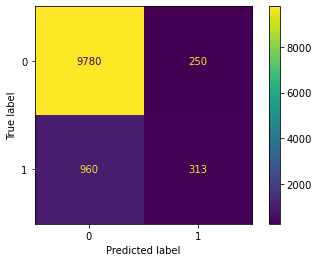

In [292]:
metrics.plot_confusion_matrix(dt,xtest,ytest)

In [ ]:
# Random Forest Classifier

In [293]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'gini', random_state = 99, max_depth = 6, min_samples_split = 150, n_estimators=100, n_jobs=-1)
rfc.fit (xtrain, ytrain)
ypred_rfc = rfc.predict(xtest)

In [298]:
rfc_acc = metrics.accuracy_score(ytest, ypred_rfc)
print("Accuracy:", rfc_acc)
rfc_pre = metrics.precision_score(ytest,ypred_rfc)
print("Precision", rfc_pre)
rfc_rec = metrics.recall_score(ytest,ypred_rfc)
print("Recall", rfc_rec)
rfc_f1 = metrics.f1_score(ytest,ypred_rfc)
print("f1_score", rfc_f1)

Accuracy: 0.8927718304874812
Precision 0.5561694290976059
Recall 0.23723487824037706
f1_score 0.3325991189427313


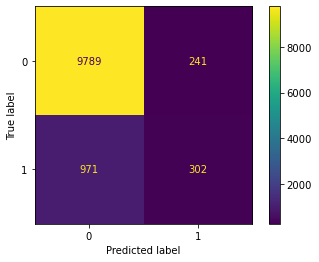

In [295]:
metrics.plot_confusion_matrix(rfc,xtest,ytest)

In [299]:
model = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest Classifier'],'Accuracy Score':[lor_acc, dt_acc, rfc_acc], 'Precision score': [lor_pre, dt_pre, rfc_pre], 'Recall score': [lor_rec, dt_rec, rfc_rec], 'F1 Score': [lor_f1, dt_f1, rfc_f1]})

In [300]:
model

,Model,Accuracy Score,Precision score,Recall score,F1 Score
0,Logistic Regression,0.882067,0.439271,0.170463,0.245614
1,Decision Tree,0.892949,0.555950,0.245876,0.340959
2,Random Forest Classifier,0.892772,0.556169,0.237235,0.332599
